## 读数据看（已经用ViennaRNA包算出自由能和点括号表达方式）

In [1]:
import pandas as pd
df = pd.read_csv('/Users/ekeulseuji-/Downloads/miRBasev21.csv')
df = df.drop(df.columns[0], axis=1) # drop the first column containing the order numbers

In [2]:
print(df.head())

   hairpin_name                                        hairpin_seq  \
0  hsa-let-7a-1  UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...   
1  hsa-let-7a-2  AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...   
2  hsa-let-7a-3  GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...   
3    hsa-let-7b  CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...   
4    hsa-let-7c  GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...   

                                          dotbracket    fe          arm5p  \
0  (((((.(((((((((((((((((((((.....(((...((((....... -34.2  hsa-let-7a-5p   
1  (((..(((.(((.(((((((((((((.........(((......))... -25.2  hsa-let-7a-5p   
2  (((.(((((((((((((((((((((((((((...))))))......... -34.1  hsa-let-7a-5p   
3  (((((.(((((((((((((((((((((((.((((((.....)))))... -46.7  hsa-let-7b-5p   
4  ((.((((((..(((.(((.(((((((((((((..((.(..((...)... -31.6  hsa-let-7c-5p   

             mature5p_seq            arm3p            mature3p_seq  class  
0  UGAGGUAGUAGGUUGUAUAGUU    hsa-let-7a-

In [3]:
# heading解释：

# hairpin_name 是 Pre-miRNA分子的id

# hairpin_seq  是 Pre-miRNA序列的具体结构 由AUGC组成 

#                                                                 5' UUC-AUACAAU-UAUUGGCCUCA 3'
# dotbracket   是 根据pair types得到的双链结构表示方法 比如这样            |.|-|||.-.-|-|||||-|||||
#                                                                 3' AUGUUAUA-AUGUAUGAU-GGAGU 5'

# fe           是 利用 ViennaRNA Package中的RNAfold计算得到的 Hairpin free energy 自由能

# arm5p        是 对应的Pre-miRNA序列切割后含mature 5p'序列的单链RNA分子id

# mature5p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 5p'序列 由AUGC组成

# arm3p        是 对应的Pre-miRNA序列切割后含mature 3p'序列的单链RNA分子id

# mature3p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 3p'序列 由AUGC组成

# class        是 类别 FALSE就说明 Pre-miRNA分子属于 Canonical miRNA （一共有507个）
#                     TRUE就说明 Pre-miRNA分子属于 Mirtrons （一共有216个）

In [4]:
# 转换成包含特征和目标分类的数据集（一共25个特征）

# hairpin_fe    是 利用 ViennaRNA Package中的 RNAfold计算得到的 Harpin free energy 自由能（原样保留）

# hairpin_len   是 Pre-miRNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature5p_len 是 包含 mature 5p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature3p_len 是 包含 mature 3p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# interarm_len 是 arm5p和arm3p序列之间的单链RNA长度（就是计算harpin_len - mature5p_len - mature3p_len）

# n_short_loop 是 长度小于4个核苷酸的环状结构的数量

# n_long_loop  是 长度大于等于4个核苷酸的环状结构的数量

# overhang_len 是 过挂长度 (harpin中茎部未配对核苷酸的数量) (就是计算 (mature5p_len - mature3p_len))
#                 正值表示5'过挂 负值表示3'过挂（表示茎部未配对核苷酸数量的差异）

# terminal_len 是 末端环长度 （hairpin中茎部末端未配对核苷酸形成的环状结构的长度）

# mature5p_A   是 包含 mature 5p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# mature3p_A   是 包含 mature 3p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# interarm_A   是 arm5p和arm3p序列之间的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# hairpin_A     是 整个发夹结构里面的 A content（就是计算序列中包含多少个字母A）

# mature5p_U   是 包含 mature 5p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# mature3p_U   是 包含 mature 3p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# interarm_U   是 arm5p和arm3p序列之间的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# hairpin_U     是 整个发夹结构里面的 U content（就是计算序列中包含多少个字母U）

# mature5p_G   是 包含 mature 5p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# mature3p_G   是 包含 mature 3p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# interarm_G   是 arm5p和arm3p序列之间的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# hairpin_G     是 整个发夹结构里面的 G content（就是计算序列中包含多少个字母G）

# mature5p_C   是 包含 mature 5p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# mature3p_C   是 包含 mature 3p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# interarm_C   是 arm5p和arm3p序列之间的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# hairpin_C     是 整个发夹结构里面的 C content（就是计算序列中包含多少个字母C）


## 把原数据拆成能用的特征

In [5]:
# 建新的 dataframe
new_df = pd.DataFrame()

# 添加特征列

# 保持原样 hairpin自由能
new_df['hairpin_fe'] = df['fe']

# 发夹和两个mature部分的长度
new_df['hairpin_len'] = df['hairpin_seq'].apply(len)
new_df['mature5p_len'] = df['mature5p_seq'].apply(len)
new_df['mature3p_len'] = df['mature3p_seq'].apply(len)

# hairpin序列中非mature5p和mature3p序列的长度
new_df['interarm_len'] = new_df['hairpin_len'] - new_df['mature5p_len'] - new_df['mature3p_len']

# dotbracket中短环的数量（计算dotbracket中 '.' '-' 和 '|' 的数量）
new_df['n_short_loop'] = df['dotbracket'].apply(lambda x: x.count('.') + x.count('-') + x.count('|'))

# dotbracket中长环的数量 （计算dotbracket中 '|||' '||'和 '|-|'的数量）
new_df['n_long_loop'] = df['dotbracket'].apply(lambda x: x.count('|||') + x.count('||') + x.count('|-|'))

# 过挂长度
new_df['overhang_len'] = new_df['mature5p_len'] - new_df['mature3p_len']

# 未配对核苷酸形成环状结构的长度（计算dotbracket中第一个分隔符之前的长度）
# 如果dotbracket中有出现分隔符 '-' 则使用分隔符之前的字符串长度作为结果/否则结果为0
new_df['terminal_len'] = df['dotbracket'].apply(lambda x: len(x.split('-')[0]) if '-' in x else 0)

# 发夹和两个mature部分的 A含量
new_df['mature5p_A'] = df['mature5p_seq'].apply(lambda x: x.count('A'))
new_df['mature3p_A'] = df['mature3p_seq'].apply(lambda x: x.count('A'))
new_df['hairpin_A'] = df['hairpin_seq'].apply(lambda x: x.count('A'))

# hairpin序列中非mature5p和mature3p序列的 A含量
new_df['interarm_A'] = new_df['hairpin_A'] - new_df['mature5p_A'] - new_df['mature3p_A']

# 发夹和两个mature部分的 U含量
new_df['mature5p_U'] = df['mature5p_seq'].apply(lambda x: x.count('U'))
new_df['mature3p_U'] = df['mature3p_seq'].apply(lambda x: x.count('U'))
new_df['hairpin_U'] = df['hairpin_seq'].apply(lambda x: x.count('U'))

# hairpin序列中非mature5p和mature3p序列的 U含量
new_df['interarm_U'] = new_df['hairpin_U'] - new_df['mature5p_U'] - new_df['mature3p_U']

# 发夹和两个mature部分的 G含量
new_df['mature5p_G'] = df['mature5p_seq'].apply(lambda x: x.count('G'))
new_df['mature3p_G'] = df['mature3p_seq'].apply(lambda x: x.count('G'))
new_df['hairpin_G'] = df['hairpin_seq'].apply(lambda x: x.count('G'))

# hairpin序列中非mature5p和mature3p序列的 G含量
new_df['interarm_G'] = new_df['hairpin_G'] - new_df['mature5p_G'] - new_df['mature3p_G']

# 发夹和两个mature部分的 C含量
new_df['mature5p_C'] = df['mature5p_seq'].apply(lambda x: x.count('C'))
new_df['mature3p_C'] = df['mature3p_seq'].apply(lambda x: x.count('C'))
new_df['hairpin_C'] = df['hairpin_seq'].apply(lambda x: x.count('C'))

# hairpin序列中非mature5p和mature3p序列的 C含量
new_df['interarm_C'] = new_df['hairpin_C'] - new_df['mature5p_C'] - new_df['mature3p_C']

# 保持原样 pre-miRNA的分类
new_df['class'] = df['class']

In [6]:
print(new_df.head())

   hairpin_fe  hairpin_len  mature5p_len  mature3p_len  interarm_len  \
0       -34.2           80            22            21            37   
1       -25.2           72            22            22            28   
2       -34.1           74            22            21            31   
3       -46.7           83            22            22            39   
4       -31.6           84            22            22            40   

   n_short_loop  n_long_loop  overhang_len  terminal_len  mature5p_A  ...  \
0            14            0             1             0           5  ...   
1            22            0             0             0           5  ...   
2            14            0             1             0           5  ...   
3            15            0             0             0           3  ...   
4            20            0             0             0           4  ...   

   interarm_U  mature5p_G  mature3p_G  hairpin_G  interarm_G  mature5p_C  \
0           7           8   

## 做特征选择

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # 随机森林
from xgboost.sklearn import XGBRegressor # 做特征选择
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV  # 划分数据集/选超参

# 模型表现的标准
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix 

# 做特征选择
import shap
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

/Users/ekeulseuji-/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# 特征列 independent variables 
X = new_df.iloc[:, :-1]  

# 目标类别列 TRUE/FALSE target variable
y = new_df['class']  

### 创建XGBRegressor模型 进行训练拟合

In [9]:
XGBmodel = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
XGBmodel.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 加载可视化模型

In [10]:
# js可视化
shap.initjs()
explainer = shap.TreeExplainer(XGBmodel)
shap_values = explainer.shap_values(X)

### 展示对模型输出做贡献的特征（红色最优）

In [11]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

### 绘制出每个样本的每个特征的SHAP值

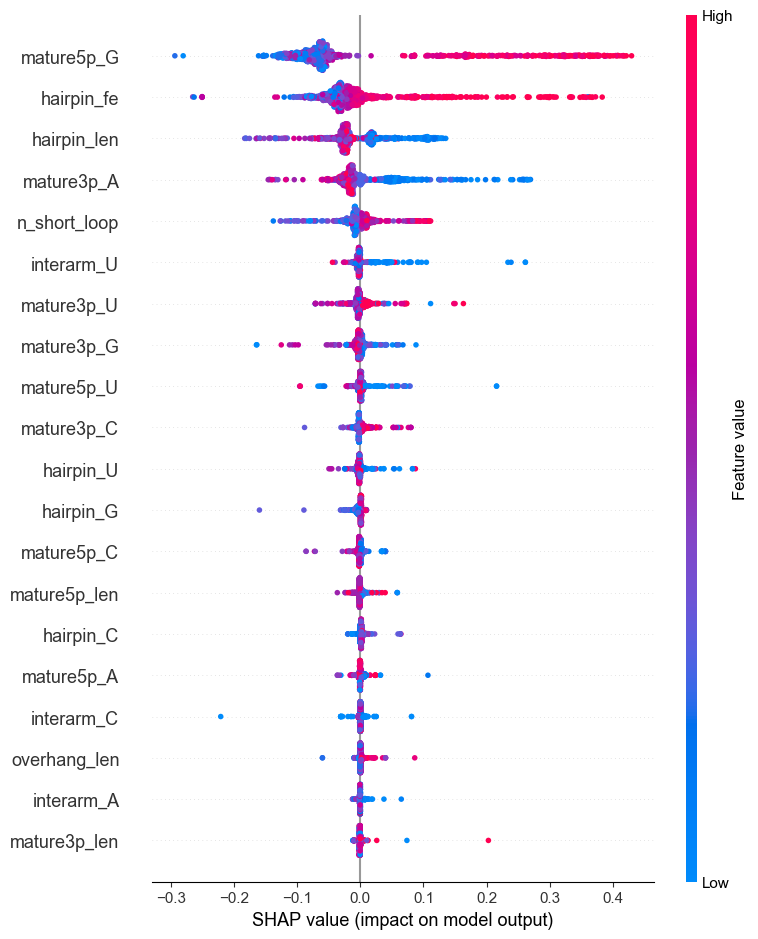

In [12]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

### 展示每个特征的SHAP值的均值绝对值标准条形图

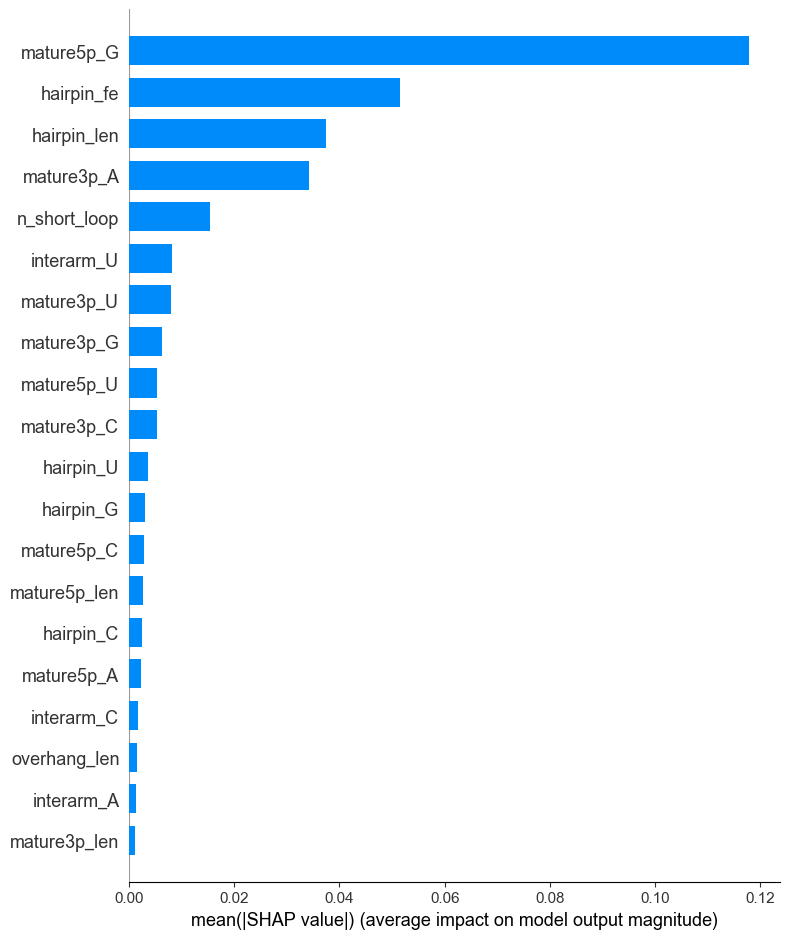

In [13]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

### 根据shap值选择10个最优特征 把列名存到Selected_Features里面

In [14]:
# 每个特征的平均绝对SHAP值
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# 根据shap值 从高到低对特征进行排序
sorted_features = sorted(zip(X.columns, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

# 取前10个最优特征
Selected_Features = [feature for feature, _ in sorted_features[:10]]

In [15]:
Selected_Features

['mature5p_G',
 'hairpin_fe',
 'hairpin_len',
 'mature3p_A',
 'n_short_loop',
 'interarm_U',
 'mature3p_U',
 'mature3p_G',
 'mature5p_U',
 'mature3p_C']

## 综合选择  逻辑回归L2 反向特征选择 选出来的特征

In [16]:
# 剔除不需要的特征列
new_X = X[Selected_Features]

In [17]:
# 划分 训练集：验证集：测试集
#       6  ：  2  ：  2

# 训练集+验证集 8：2 测试集
X_tv, X_test, y_tv, y_test = train_test_split(new_X, y, test_size=0.2, random_state=10086)

# 训练集 4：1 验证集（剩下8份里面）
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=10086)

# 用GA-BP模型

In [18]:
import torch
import pygad
import torchga
import numpy

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 存每代的损失和准确率
losses = []
accuracies = []

In [19]:
# 流程

# 初始化种群：用遗传算法的idea 随机生成一组初始的神经网络权重和偏置的种群

# 评估适应度：对每个个体（即神经网络）用反向传播算法计算其在训练集上的损失函数值 并将其作为适应度评估个体的优劣
# 选择操作：根据适应度值 使用选择算子（如轮盘赌选择 各个个体被选中的概率和适应度函数成正比）从种群中选出一部分个体作为母代
# 交叉操作：对于选中的母代个体 使用交叉算子（如单点交叉或多点交叉）生成新的子代个体
# 变异操作：对于生成的子代个体 使用变异算子（如位变异或高斯变异）对其进行随机变异（增加种群的多样性）
# 更新种群：把母代和子代个体合并形成新的种群
# （重复前面五个步骤直到达到停止条件（如达到最大迭代次数或达到期望的适应度值））

# 选择最优个体：根据适应度值选择种群中适应度最好的个体作为最终的神经网络模型
# 使用最优个体进行预测：用选择出的最优个体进行测试集上的预测评估模型的性能

### 获取适应度（适应度方程）

In [20]:
def fitness_func(ga_instanse, solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    
    predictions = torch.sigmoid(torchga.predict(model=model, solution=solution, data=data_inputs))

    # predictions = torchga.predict(model=model, solution=solution, data=data_inputs)

    solution_fitness = 1.0 / (loss_function(predictions, data_outputs).detach().numpy() + 0.00000001)

    return solution_fitness

### 在每代遗传算法进化过程中 输出当前的世代数和适应度 而且存一下损失和准确率方便之后画折线

In [21]:
def callback_generation(ga_instance):
    
    print('Generation = {generation}'.format(generation=ga_instance.generations_completed))
    print('Fitness    = {fitness}'.format(fitness=ga_instance.best_solution()[1]))
    
    # 存每代的损失和准确率
    # losses = []
    # accuracies = []
    
    # 当前最佳权重
    best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=ga_instance.best_solution()[0])
    
    # 用到神经网络里 用验证集算损失和准确率
    model.load_state_dict(best_solution_weights)
    
    # 在每一代结束时进行验证 
    # 验证集输入
    val_inputs = torch.from_numpy(X_val.values).float()
    
    val_outputs = torch.from_numpy(y_val.values).float()
    val_outputs= val_outputs.reshape((val_outputs.shape[0], 1))
    
    # 进行预测 这里 val_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失
    val_predictions = model(val_inputs)
    val_loss = loss_function(val_predictions, val_outputs).detach().numpy()
    
    # 将概率值转换为包含0和1的预测目标列
    val_predicted_labels = (val_predictions >= threshold).int()
    val_true_labels = val_outputs
    val_accuracy = (val_predicted_labels == val_true_labels).sum().item() / len(val_true_labels)
    
    # val_accuracy = torch.sum(torch.max(val_predictions, axis=1).indices == val_outputs) / len(val_outputs)
    
    print('Val Loss:', val_loss)
    print('Val Accuracy:', val_accuracy)

    
    losses.append(val_loss)
    accuracies.append(val_accuracy)

### BP神经网络主函数

In [22]:
input_layer = torch.nn.Linear(in_features=10, out_features=5)
relu_layer1 = torch.nn.ReLU()

dense_layer = torch.nn.Linear(in_features=5, out_features=3)
relu_layer2 = torch.nn.ReLU()

output_layer = torch.nn.Linear(in_features=3, out_features=1)

sigmoid_layer = torch.nn.Sigmoid()

model = torch.nn.Sequential(input_layer,
                            relu_layer1,
                            dense_layer,
                            relu_layer2,
                            output_layer,
                            sigmoid_layer)

# 建pygad.torchga.TorchGA类的实例 产生初始种群（num_solutions=30表示初始种群将包含30个个体）
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=30)

loss_function = torch.nn.BCEWithLogitsLoss()

### 输入/输出数据

In [23]:
# 将输入数据转换为张量并进行形状调整
data_inputs = torch.from_numpy(X_train.values).float()

# 将输出数据转换为张量
data_outputs = torch.from_numpy(y_train.values).float()
data_outputs= data_outputs.reshape((data_outputs.shape[0], 1))

In [24]:
# data_inputs

In [25]:
# data_outputs

### PyGAD 参数设置

In [26]:
# 进化代数
num_generations = 2500

# 在备选池中被选为亲本的解（个体）的数量
num_parents_mating = 20

# 初始种群（初始网络权重）
initial_population = torch_ga.population_weights 

# 设置阈值 预测值大于这个就是分类成1 小于就分类成0
threshold = 0.5

# 选择算子的类型 rws是轮盘赌选择 Roulette Wheel Selection
parent_selection_type = 'rws'

# 交叉算子类型 单点交叉
crossover_type = 'single_point'

# 变异算子类型 随机变异
mutation_type = 'random'

# 设置基因突变的百分比
mutation_percent_genes = 35

# 下一世代的种群要保留的父母代数量
# （-1表示保留所有父母 0表示不保留任何父母）
keep_parents = -1 

### 建一个 pygad.GA 类下的实例 ga_instance

In [27]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)  # 就是把上面的参数全扔进去了

# 开始遗传进化
ga_instance.run()

Generation = 1
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 2
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 3
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 4
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 5
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 6
Fitness    = 1.1643108110292453
Val Loss: 0.68952286
Val Accuracy: 0.8054054054054054
Generation = 7
Fitness    = 1.165435275443851
Val Loss: 0.68641233
Val Accuracy: 0.8108108108108109
Generation = 8
Fitness    = 1.165435275443851
Val Loss: 0.68641233
Val Accuracy: 0.8108108108108109
Generation = 9
Fitness    = 1.165435275443851
Val Loss: 0.68641233
Val Accuracy: 0.8108108108108109
Generation = 10
Fitness    = 1.165435275443851
Val Loss: 0.68641233
Val Accuracy: 0.8108108108

Generation = 83
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 84
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 85
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 86
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 87
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 88
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 89
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 90
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 91
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy: 0.9297297297297298
Generation = 92
Fitness    = 1.1752752917762908
Val Loss: 0.65351313
Val Accuracy:

Generation = 166
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 167
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 168
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 169
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 170
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 171
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 172
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 173
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 174
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135135135135
Generation = 175
Fitness    = 1.176051849269289
Val Loss: 0.6544636
Val Accuracy: 0.9135135

Generation = 247
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 248
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 249
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 250
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 251
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 252
Fitness    = 1.1770066911468826
Val Loss: 0.6570327
Val Accuracy: 0.9243243243243243
Generation = 253
Fitness    = 1.177109255726965
Val Loss: 0.6470055
Val Accuracy: 0.9297297297297298
Generation = 254
Fitness    = 1.177109255726965
Val Loss: 0.6470055
Val Accuracy: 0.9297297297297298
Generation = 255
Fitness    = 1.177109255726965
Val Loss: 0.6470055
Val Accuracy: 0.9297297297297298
Generation = 256
Fitness    = 1.177109255726965
Val Loss: 0.6470055
Val Accuracy: 0.9

Generation = 329
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 330
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 331
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 332
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 333
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 334
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 335
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 336
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 337
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 338
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243

Generation = 412
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 413
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 414
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 415
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 416
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 417
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 418
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 419
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 420
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 421
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243

Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 497
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 498
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 499
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 500
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 501
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 502
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 503
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 504
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generation = 505
Fitness    = 1.1779976574012885
Val Loss: 0.654253
Val Accuracy: 0.9243243243243243
Generat

Generation = 579
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 580
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 581
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 582
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 583
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 584
Fitness    = 1.1781094120262687
Val Loss: 0.6501461
Val Accuracy: 0.9351351351351351
Generation = 585
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 586
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 587
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 588
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.

Generation = 661
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 662
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 663
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 664
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 665
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 666
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 667
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 668
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 669
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 670
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918

Generation = 745
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 746
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 747
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 748
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 749
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 750
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 751
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 752
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 753
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 754
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918

Generation = 827
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 828
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 829
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 830
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 831
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 832
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 833
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 834
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 835
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 836
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918

Generation = 909
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 910
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 911
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 912
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 913
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 914
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 915
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 916
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 917
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 918
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918

Generation = 991
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 992
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 993
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 994
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 995
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 996
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 997
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 998
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 999
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1000
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.91891

Generation = 1072
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1073
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1074
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1075
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1076
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1077
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1078
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1079
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1080
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1081
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Generation = 1156
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1157
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1158
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1159
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1160
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1161
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1162
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1163
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1164
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1165
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Generation = 1240
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1241
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1242
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1243
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1244
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1245
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1246
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1247
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1248
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1249
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1324
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1325
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1326
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1327
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1328
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1329
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1330
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1331
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1332
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.91891891891891

Generation = 1405
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1406
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1407
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1408
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1409
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1410
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1411
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1412
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1413
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1414
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Generation = 1487
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1488
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1489
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1490
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1491
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1492
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1493
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1494
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1495
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1496
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Generation = 1571
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1572
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1573
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1574
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1575
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1576
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1577
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1578
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1579
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1580
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1652
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1653
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1654
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1655
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1656
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1657
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1658
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1659
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1660
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1661
Fitness    

Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1733
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1734
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1735
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1736
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1737
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1738
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1739
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1740
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1741
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1742
Fitness    

Generation = 1815
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1816
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1817
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1818
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1819
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1820
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1821
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1822
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1823
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1824
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy

Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1898
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1899
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1900
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1901
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1902
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1903
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1904
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1905
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1906
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.91891891891891

Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1979
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1980
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1981
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1982
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1983
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1984
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1985
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1986
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 1987
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.91891891891891

Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2062
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2063
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2064
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2065
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2066
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2067
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2068
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2069
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2070
Fitness    = 1.179055584351132
Val Loss: 0.65630645
Val Accuracy: 0.91891891891891

Generation = 2144
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2145
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2146
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2147
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2148
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2149
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2150
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2151
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2152
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2153
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Va

Generation = 2227
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2228
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2229
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2230
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2231
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2232
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2233
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2234
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2235
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2236
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Va

Generation = 2310
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2311
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2312
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2313
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2314
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2315
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2316
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2317
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2318
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2319
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Va

Generation = 2393
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2394
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2395
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2396
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2397
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2398
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2399
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2400
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2401
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2402
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Va

Generation = 2476
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2477
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2478
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2479
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2480
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2481
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2482
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2483
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2484
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Val Accuracy: 0.918918918918919
Generation = 2485
Fitness    = 1.1792612805186453
Val Loss: 0.65630645
Va

### 适应度值在进化过程中的变化曲线

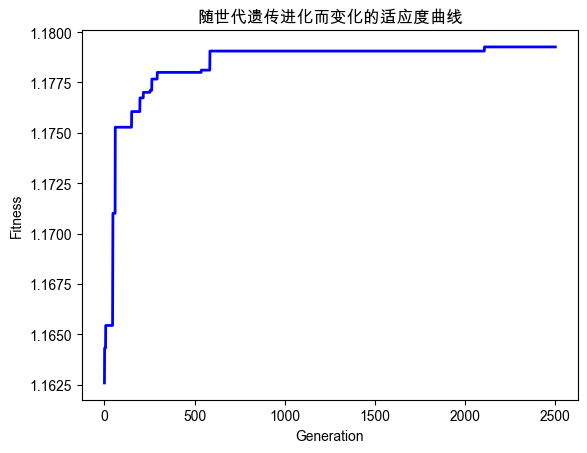

In [28]:
plt.plot(ga_instance.best_solutions_fitness, linewidth=2, color='b')
plt.title('随世代遗传进化而变化的适应度曲线')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

### 返回最优解的适应度和index

In [29]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('最优解适应度值 = {solution_fitness}'.format(solution_fitness=solution_fitness))
# print('最优解索引 : {solution_idx}'.format(solution_idx=solution_idx))

最优解适应度值 = 1.1792612805186453


### 给BP神经网络用遗传算法找出的最佳权重进行训练

In [30]:
# 训练集输入
train_inputs = torch.from_numpy(X_train.values).float()

# 训练集输出
train_outputs = torch.from_numpy(y_train.values).float()
train_outputs = train_outputs.reshape((train_outputs.shape[0], 1))

In [31]:
# 把遗传算法得到的最优解（权重向量）转换为神经网络模型的权重字典形式 存在 best_solution_weights变量中
best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=solution)

# 更新模型的权重
model.load_state_dict(best_solution_weights)

<All keys matched successfully>

In [32]:
# 算训练集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

train_predictions = model(train_inputs)
# print('Predictions : n', train_predictions) # 可以打印过程

train_loss = loss_function(train_predictions, train_outputs).detach().numpy()

print('Training Loss:', loss_function(train_predictions, train_outputs).detach().numpy())

Training Loss: 0.63422126


In [33]:
# 算训练集模型准确率
# accuracy = torch.sum(torch.max(predictions, axis=1).indices == data_outputs) / len(data_outputs)
# print('Training and Validation Accuracy: ', accuracy.detach().numpy())

# predicted_labels = (predictions > 0.5).float()
# true_labels = torch.argmax(data_outputs, dim=1)
# accuracy = (predicted_labels == true_labels).sum().item() / len(true_labels)

# a = torch.max(predictions, axis=1)
# b = torch.max(data_outputs, axis=1)

# accuracy = torch.true_divide(torch.sum(a.indices == b.indices), len(data_outputs))

    
# 将概率值转换为包含0和1的预测目标列
train_predicted_labels = (train_predictions >= threshold).int()
train_true_labels = train_outputs
train_accuracy = (train_predicted_labels == train_true_labels).sum().item() / len(train_true_labels)

print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.9421338155515371


### 训练过程中损失和准确率随着epoch（世代进化）增加而变化的图像

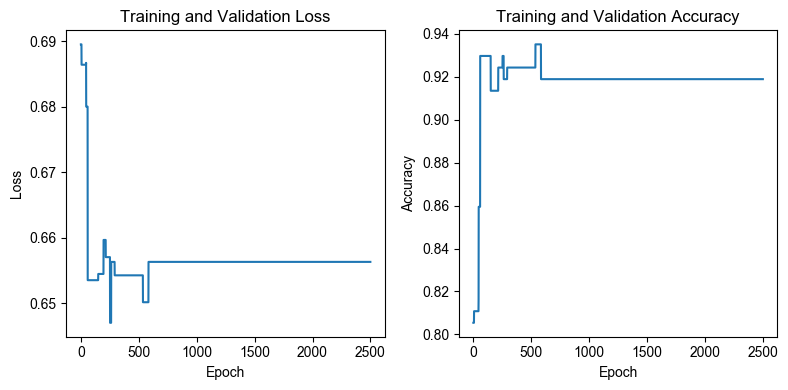

In [34]:
import matplotlib.pyplot as plt

# 绘制损失和准确率随着epoch增加而变化的图像
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

### GA-BP模型最终在测试集上的表现

In [35]:
# 将测试集转换为张量并调整形状
test_inputs = torch.from_numpy(X_test.values).float()

# 将输出数据转换为张量
test_outputs = torch.from_numpy(y_test.values).float()
test_outputs = test_outputs.reshape((test_outputs.shape[0], 1))

In [36]:
# test_inputs

In [37]:
# test_outputs

In [38]:
# 算测试集集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

test_predictions = model(test_inputs)
# print('Predictions : n', test_predictions) # 可以打印过程

test_loss = loss_function(test_predictions, test_outputs).detach().numpy()

print('Testing Loss:', loss_function(test_predictions, test_outputs).detach().numpy())

Testing Loss: 0.6242064


In [39]:
# 算测试集准确率 
    
# 将概率值转换为包含0和1的预测目标列
test_predicted_labels = (test_predictions >= threshold).int()
test_true_labels = test_outputs
test_accuracy = (test_predicted_labels == test_true_labels).sum().item() / len(test_true_labels)

print('Testing Accuracy:', test_accuracy)

Testing Accuracy: 0.9243243243243243



GA-BP Neural Network
Average Precision: 0.798013821290309
AUROC: 0.915052053209948
Accuracy: 0.9243243243243243
Precision: 0.9243243243243243
Recall: 0.9243243243243243
F1-Score: 0.9243243243243243


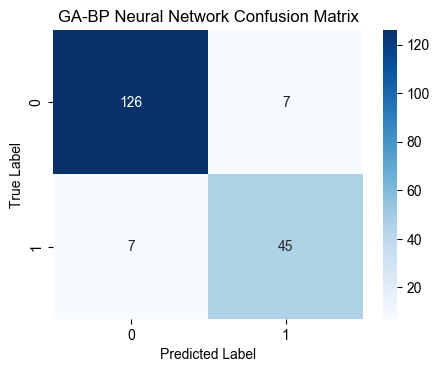

In [40]:
# 计算测试集 平均精度 ROC曲线下面积 准确率 
average_precision = average_precision_score(test_outputs, test_predictions.detach().numpy())
auc_score = roc_auc_score(test_outputs, test_predictions.detach().numpy())
precision = precision_score(test_true_labels, test_predicted_labels, average='weighted', zero_division=1)
recall = recall_score(test_true_labels, test_predicted_labels, average='weighted')
f1 = f1_score(test_true_labels, test_predicted_labels, average='weighted')
print()
print('GA-BP Neural Network')
print('Average Precision:', average_precision)
print('AUROC:', auc_score)
print('Accuracy:', test_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

# 混淆矩阵
cm = confusion_matrix(test_true_labels, test_predicted_labels)

plt.figure(figsize=(5, 3.75))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('GA-BP Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 其他分类模型预测测试集的表现


Binary Classification (SVM)
Average Precision: 0.6403326403326404
AUROC: 0.8123192596876807
Accuracy: 0.8648648648648649
Precision: 0.8616216216216217
Recall: 0.8648648648648649
F1-Score: 0.8617213565667172


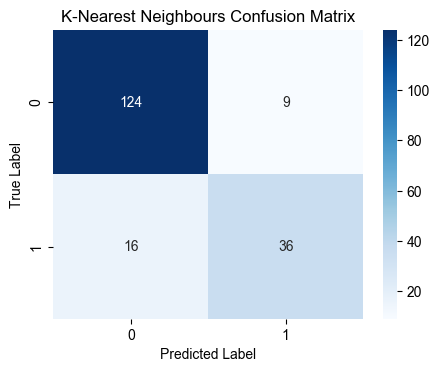

In [41]:
from sklearn.svm import SVC

def Binary_Classification_SVM(X_train, X_test, y_train, y_test):
    
    # 拟合支持向量机模型
    svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, random_state=None)
    svm.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = svm.predict(X_test)
    
    # 看模型表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print()
    print('Binary Classification (SVM)')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('K-Nearest Neighbours Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
    
Binary_Classification_SVM(X_train, X_test, y_train, y_test)


K-Nearest Neighbours
Average Precision: 0.6660929265580429
AUROC: 0.819838056680162
Accuracy: 0.8756756756756757
Precision: 0.8732376660971486
Recall: 0.8756756756756757
F1-Score: 0.8718210267683951


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


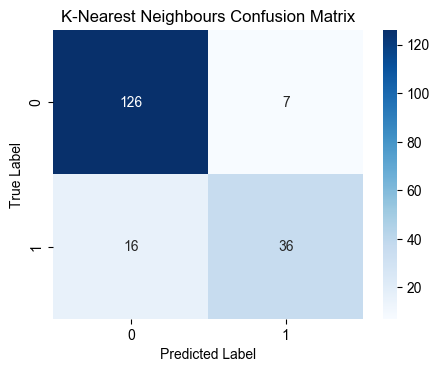

In [42]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, X_test, y_train, y_test):
    
    # 拟合KNN模型
    knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=35, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = knn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print()
    print('K-Nearest Neighbours')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('K-Nearest Neighbours Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
KNN(X_train, X_test, y_train, y_test)


Gradient Boosting
Average Precision: 0.667317021163175
AUROC: 0.8081260844418738
Accuracy: 0.8756756756756757
Precision: 0.8753301246451931
Recall: 0.8756756756756757
F1-Score: 0.8696918116272956


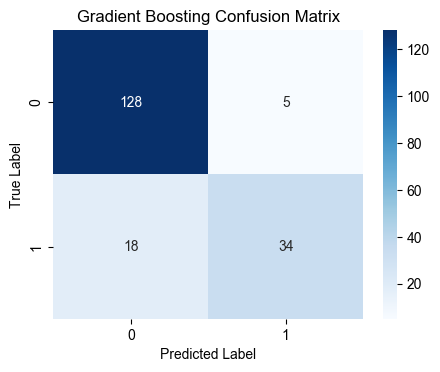

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

def Gradient_Boosting(X_train, X_test, y_train, y_test):
    
    # 拟合梯度提升模型
    gb = GradientBoostingClassifier(loss='deviance', learning_rate=0.02, n_estimators=50, 
                                    subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                    random_state=100, verbose=0, validation_fraction=0.1, tol=0.001)
    gb.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = gb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print()
    print('Gradient Boosting')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred)) 
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Gradient_Boosting(X_train, X_test, y_train, y_test)


Naive Bayes
Average Precision: 0.7122007242974985
AUROC: 0.895532099479468
Accuracy: 0.8918918918918919
Precision: 0.9027721663441568
Recall: 0.8918918918918919
F1-Score: 0.8945219890943575


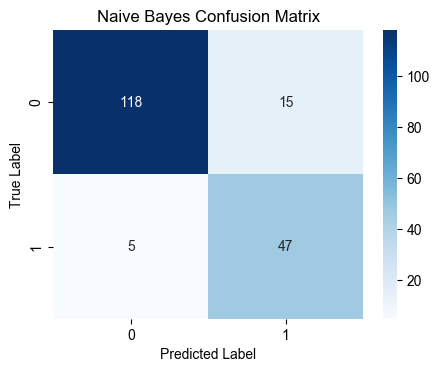

In [44]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes(X_train, X_test, y_train, y_test):
    
    # 拟合朴素贝叶斯模型
    nb = GaussianNB(priors=None, var_smoothing=1e-09)
    nb.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print()
    print('Naive Bayes')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred)) 
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Naive Bayes Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Naive_Bayes(X_train, X_test, y_train, y_test)


BP Neural Network
Average Precision: 0.7201663201663202
AUROC: 0.8817235396182765
Accuracy: 0.8972972972972973
Precision: 0.8995426195426196
Recall: 0.8972972972972973
F1-Score: 0.8981512979523001


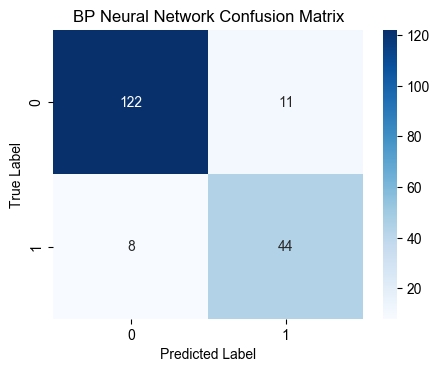

In [45]:
from sklearn.neural_network import MLPClassifier

def Neural_Network(X_train, X_test, y_train, y_test):
    
    # 拟合传统的BP神经网络模型
    nn = MLPClassifier(random_state=100, max_iter=1000)
    nn.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print()
    print('BP Neural Network')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))  
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1)
    
    # import pydotplus
    # from sklearn.tree import export_graphviz

    # 绘制网络结构图（不想画了）
    # fig, ax = plt.subplots()
    # for i in range(len(nn.coefs_)):
    #    layer_weights = nn.coefs_[i]
    #    for j in range(layer_weights.shape[1]):
    #        ax.arrow(i, j, i+1, j, head_width=0.1, head_length=0.1, fc='black', ec='black')
    # ax.set_xlabel('Layer')
    # ax.set_ylabel('Neuron')
    # ax.set_title('MLP Network Structure')
    # plt.show()
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('BP Neural Network Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Neural_Network(X_train, X_test, y_train, y_test)